In [49]:
import numpy as np
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*
from utils_data_loading import*
from utils_features_manipulation import*
from standardization import*
import random

import matplotlib.pyplot as plt

### Loading data

In [3]:
traindata,_ = load_data('Data/train.csv')

X_total, Y_total = structure_data(traindata)

X_total = replace_bad_data_with_nans(X_total, -999)

X_total, col = replace_nans_with_median(X_total, threshold=0.5)



In [7]:
X_s = standardize_data_parallel(X_total)



Baseline: 0.7340506666666667 0.733844


In [ ]:
traindata,_ = load_data('Data/train.csv')

X_total, Y_total = structure_data(traindata)

X_total = replace_bad_data_with_nans(X_total, -999)

X_total, col = replace_nans_with_median(X_total, threshold=0.5)

X_s = standardize_data_parallel(X_total)

#Obtained from genetic algorithm
index = (1, 3, 5, 7, 13, 16, 18, 20, 23)
degree = [(1, 0.25, 0.3333333333333333, 2), (1, 0.03333333333333333, 0.1, 0.2, 0.3333333333333333, 0.5, 2), (1, 0.1, 0.3333333333333333, 20), (1, 0.03333333333333333, 0.05, 0.2, 0.3333333333333333, 30), (1, 0.05, 10), (1, 0.2, 0.25, 0.3333333333333333, 3, 4, 5), (1, 3, 10, 20), (1, 0.1, 0.3333333333333333, 4), (1, 0.03333333333333333, 0.2), (1, 0.1, 2, 5), (1, 0.05, 0.1), (1, 0.2, 0.3333333333333333, 0.5, 2, 4, 10), (1, 0.1, 0.25, 0.3333333333333333, 5, 30), (1, 3, 30), (1, 0.1, 5, 10), (1, 0.25, 3, 30), (1, 0.1, 10, 30), (1, 0.2, 1, 3), (1, 0.05, 0.5, 30), (1, 3, 4), (1, 0.3333333333333333, 3, 5), (1, 2, 10), (1, 0.25, 0.3333333333333333), (1, 0.05, 0.2, 30)]

X_poly = build_poly_index(X_s, index, degree)

In [87]:
#Obtained from genetic algorithm
index = (1, 3, 5, 7, 13, 16, 18, 20, 23)
degree = [(1, 0.25, 0.3333333333333333, 2), (1, 0.03333333333333333, 0.1, 0.2, 0.3333333333333333, 0.5, 2), (1, 0.1, 0.3333333333333333, 20), (1, 0.03333333333333333, 0.05, 0.2, 0.3333333333333333, 30), (1, 0.05, 10), (1, 0.2, 0.25, 0.3333333333333333, 3, 4, 5), (1, 3, 10, 20), (1, 0.1, 0.3333333333333333, 4), (1, 0.03333333333333333, 0.2), (1, 0.1, 2, 5), (1, 0.05, 0.1), (1, 0.2, 0.3333333333333333, 0.5, 2, 4, 10), (1, 0.1, 0.25, 0.3333333333333333, 5, 30), (1, 3, 30), (1, 0.1, 5, 10), (1, 0.25, 3, 30), (1, 0.1, 10, 30), (1, 0.2, 1, 3), (1, 0.05, 0.5, 30), (1, 3, 4), (1, 0.3333333333333333, 3, 5), (1, 2, 10), (1, 0.25, 0.3333333333333333), (1, 0.05, 0.2, 30)]

X_poly = build_poly_index(X_s, index, degree)

dtmp_tr,dtmp_te = cross_validation(Y_total, X_poly, k_fold=4, seed=2, function_name='least_squares')
print("Baseline:", dtmp_tr, dtmp_te)

Baseline: 0.805512 0.805008


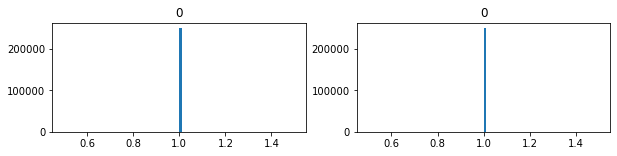

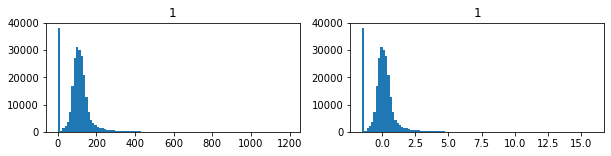

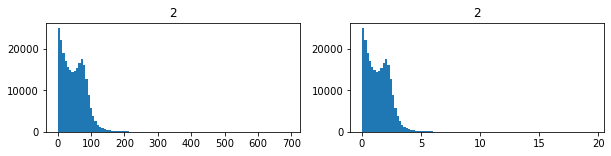

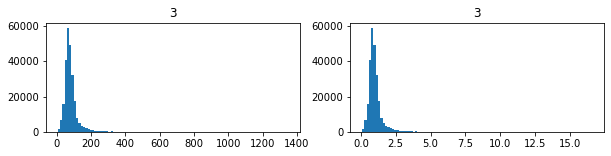

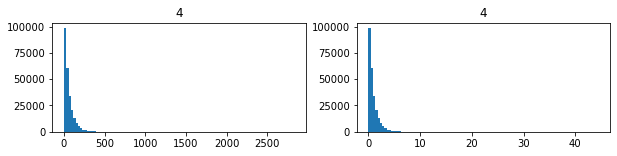

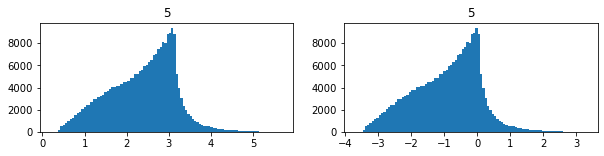

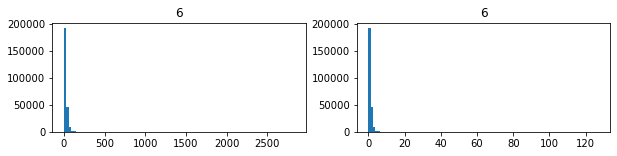

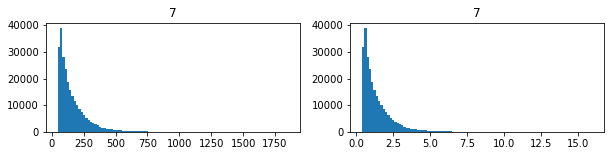

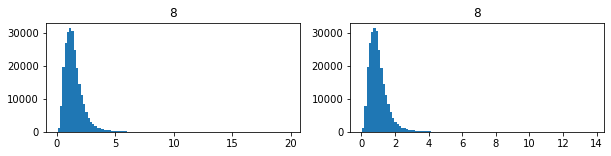

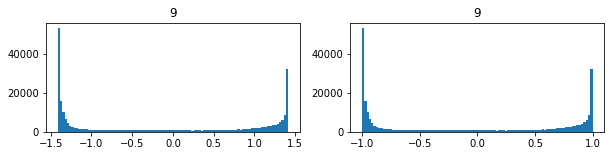

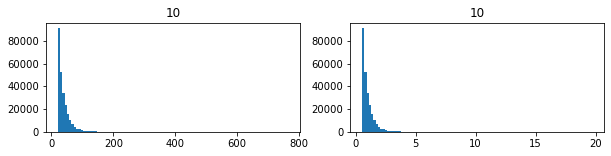

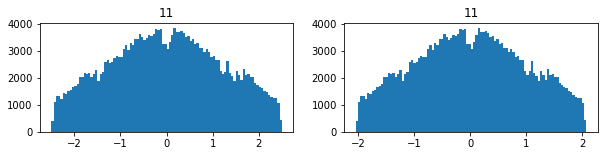

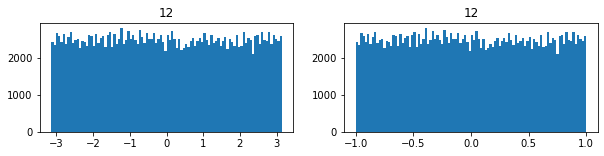

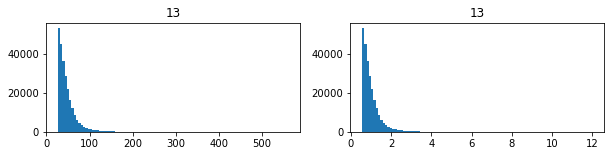

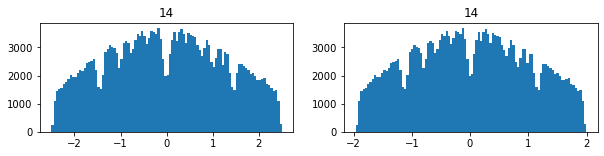

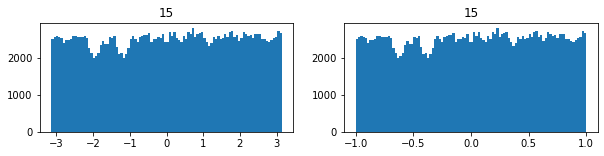

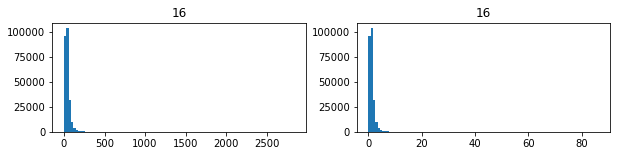

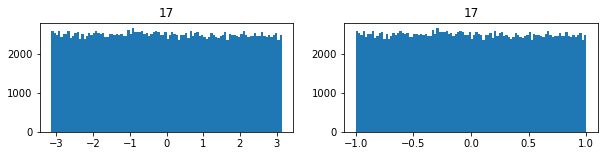

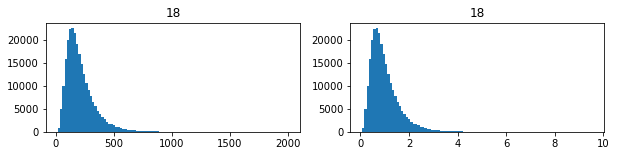

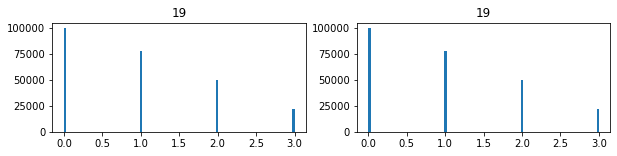

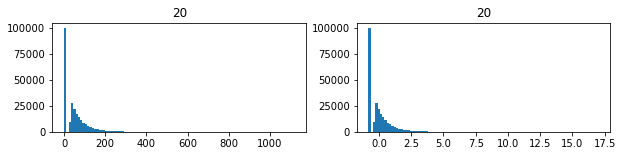

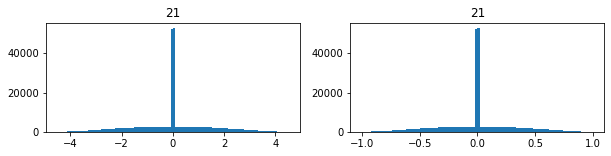

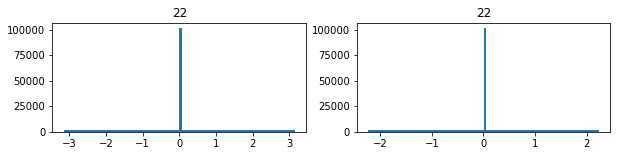

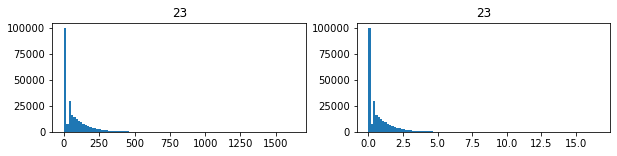

In [73]:
for i in range(X_total.shape[1]):
    plt.figure(figsize = (10,2))
    plt.subplot(1,2,1)
    plt.hist(X_total[:,i], bins = 100)
    plt.title(i)
    
    plt.subplot(1,2,2)
    plt.hist(X_s[:,i], bins = 100)
    plt.title(i)
    
    plt.show()

In [84]:
thresh = [[1,5],[5,0],[15,0],[17,0],]

#Adjust for threshold index after polynomial expansion
thresh_adj = []
for j in range(len(thresh)):
    check = True
    for i in range(X_poly.shape[1]):
        if (X_poly[:,i] == X_s[:,thresh[j][0]]).all():
            thresh_adj.append([i, thresh[j][1]])
            check = False
    if check:
        print(j, thresh[j][0], "ERROR")

X_sets, Y_sets, thresholds = split_data_set(X_poly, Y_total, thresh)

In [86]:
points_x = []
points_y = []
for i in range(len(X_sets)):
    X_set = X_sets[i]
    Y_set = Y_sets[i]
    
    acc = 0
    acc2 = 0
    print(thresholds[i])
    for j in range(len(X_set)):
        X_split = X_set[j]
        remove = []
        # Removes linearly dependent rows
        for i in range(1,X_split.shape[1]):
            if len(np.unique(X_split[:,i])) == 1:
                remove.append(i)
        X_split = np.delete(X_split,remove,1)
        
        Y_split = Y_set[j]
        
        dtmp_tr,dtmp_te = cross_validation(Y_split, X_split, k_fold=4, seed=2, function_name='least_squares')
        
        acc = acc + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        
        if dtmp_tr>0.66:
            acc2 = acc2 + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        else:
            select = max([sum(Y_split/Y_split.shape[0]), 1-sum(Y_split/Y_split.shape[0])])
            acc2 = acc2 + select*(Y_split.shape[0]/Y_total.shape[0])
            
        print(X_split.shape[0], "\t", dtmp_tr, dtmp_te, "\t", sum(Y_split/Y_split.shape[0])+dtmp_tr)
        points_x.append(sum(Y_split/Y_split.shape[0]))
        points_y.append(dtmp_tr)
    print("TOTAL:", acc)
    print("ARTIF:", acc2, "\n")

([1, 5],)
909 	 0.9511747430249633 0.9449339207048458 	 1.0006796935200128
249091 	 0.8067630716855086 0.8065021197327852 	 1.1505009024378055
TOTAL: 0.807288152522499
ARTIF: 0.807288152522499 

([5, 0],)
129531 	 0.7814320713153398 0.7811284046692607 	 1.2978103900184614
120469 	 0.8476165178027915 0.8475777799913671 	 1.0035072448777915
TOTAL: 0.8133247676509271
ARTIF: 0.8133247676509271 

([15, 0],)
250000 	 0.805512 0.805008 	 1.14818000000026
TOTAL: 0.805512
ARTIF: 0.805512 

([17, 0],)
40891 	 0.7461194808582794 0.7443259636079045 	 1.0511010171376887
209109 	 0.8072064834120806 0.8071953249038775 	 1.1572440236422663
TOTAL: 0.7972148489263706
ARTIF: 0.7972148489263706 

([2, 6],)
250000 	 0.805512 0.805008 	 1.14818000000026
TOTAL: 0.805512
ARTIF: 0.805512 

([1, 5], [5, 0])
909 	 0.9511747430249633 0.9449339207048458 	 1.0006796935200128
128622 	 0.7812444928212305 0.7809049914476753 	 1.3009223084359758
120469 	 0.8476165178027915 0.8475777799913671 	 1.0035072448777915
TOTAL:

31412 	 0.829863321872745 0.8283140201196995 	 1.1527972324802112
97210 	 0.766853894055359 0.766233231832771 	 1.3501066458291295
8679 	 0.6819963116643614 0.6753112033195021 	 0.9464276977687608
111790 	 0.85404515690414 0.853633663720614 	 1.0015091518947408
TOTAL: 0.8115317560864193
ARTIF: 0.8115317560864193 



In [83]:
([1, 5], [5, 0], [15, 0], [17, 0])

([1, 5], [5, 0], [15, 0], [17, 0])

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(points_x, points_y)

In [ ]:
np.linalg.matrix_rank(X_sets[0][1])

array([[ 1.00000000e+00,  8.14170000e+01,  8.09430000e+01, ...,
         6.49864986e+01, -7.87171377e-04, -3.33072684e-02],
       [ 1.00000000e+00,  1.69150000e+01,  1.34805000e+02, ...,
         6.52619361e+01, -9.95903504e-04, -3.32091839e-02],
       [ 1.00000000e+00,  5.05590000e+01,  1.00989000e+02, ...,
         6.56959650e+01, -4.05559186e-04, -3.26799804e-02],
       ...,
       [ 1.00000000e+00,  5.81790000e+01,  6.80830000e+01, ...,
         6.59747928e+01, -3.19209875e-05, -3.29227703e-02],
       [ 1.00000000e+00,  1.93620000e+01,  6.88120000e+01, ...,
         6.49681829e+01, -1.65108134e-04, -3.32206927e-02],
       [ 1.00000000e+00,  7.27560000e+01,  7.08310000e+01, ...,
         6.58942862e+01,  5.33563617e-04, -3.26961510e-02]])

In [30]:

for i in range(X_split.shape[1]):
    print(X_split[:,i])
    print(len(np.unique(X_split[:,i])))

[1. 1. 1. ... 1. 1. 1.]
1
[143.905      175.864      105.594      ... 112.89986547  94.951
 112.73605694]
82470
[81.417 16.915 50.559 ... 58.179 19.362 72.756]
65105
[ 80.943 134.805 100.989 ...  68.083  68.812  70.831]
63577
[ 0.414 16.405  4.288 ... 22.439 13.504  7.479]
33282
[3.31  3.891 2.904 ... 2.585 3.365 2.025]
4340
[ 0.414 16.405  4.288 ... 22.439 13.504  7.479]
33287
[75.968 57.983 65.333 ... 50.618 55.859 83.24 ]
50327
[2.354 1.056 0.675 ... 1.162 0.999 0.936]
3449
[-1.285 -1.385 -1.366 ... -1.345  1.414 -1.411]
2757
[22.647 28.209 39.008 ... 23.416 27.944 43.003]
35756
[-1.655 -2.197  2.433 ... -1.609 -2.211  1.685]
4958
[ 0.01  -2.231 -2.532 ...  2.776  2.792  2.653]
6285
[53.321 29.774 26.325 ... 27.202 27.915 40.236]
38131
[-0.522  0.798  0.21  ...  0.308 -0.874  1.49 ]
4973
[-3.1    1.569  1.884 ...  1.042 -0.296  0.637]
6285
[31.082  2.723 37.791 ... 46.737 12.15  40.729]
50313
[ 0.06  -0.871  0.024 ... -0.867  0.811 -1.596]
6285
[ 86.062  53.131 129.804 ...  80.408 1